## Importing Libraries ##

In [707]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## Checking Working Directories ##

In [708]:
import os
print(os.getcwd())

C:\Users\Obinna J. Duruiheme\Customer Churn\Notebook


In [709]:
print(os.listdir())

['.ipynb_checkpoints', 'Customer Churn.ipynb']


## Loading Data ##

In [710]:
df = pd.read_excel("../Data/Dataset.xlsx")

## Exploring Dataset ##

In [711]:
df.head(3)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10


In [712]:
df.tail(3)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
12480,13481,Lisa Rodgers,38,Male,East Erin,william37@example.com,951-489-9554,"56050 Steven Summit Suite 383\nJohnmouth, NM 2...",Segment C,"[{'Product': 'Furisode Kimonos', 'Frequency': ...",...,"[{'Type': 'Email', 'Date': '2020-05-22'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 26...","{'PageViews': 96, 'TimeSpent(minutes)': 1}","[{'Action': 'Search', 'Page': 'author', 'Times...","{'Logins': 9, 'Frequency': 'Monthly'}","{'Rating': 5, 'Comment': 'Offer particularly s...","[{'Email_Sent': '2020-05-18', 'Email_Opened': ...",1,1,2020-10-13 15:09:13
12481,13482,Kristin Carey,26,Female,New Leah,josephcarter@example.net,001-335-464-3236x722,"72356 Teresa Rapid\nPorterborough, SC 40076",Segment A,"[{'Product': 'Sequins & Glitter', 'Frequency':...",...,"[{'Type': 'Call', 'Date': '2020-09-11'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 30...","{'PageViews': 63, 'TimeSpent(minutes)': 2}","[{'Action': 'Click', 'Page': 'post', 'Timestam...","{'Logins': 2, 'Frequency': 'Monthly'}","{'Rating': 5, 'Comment': 'Rest something conce...","[{'Email_Sent': '2021-09-05', 'Email_Opened': ...",0,0,2020-06-24 23:49:01
12482,13483,Melissa Carter,29,Male,West Amanda,regina88@example.net,816-238-9247,USCGC Lopez\nFPO AE 85542,Segment C,"[{'Product': 'Pool Brushes & Brooms', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-02-17'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 11...","{'PageViews': 93, 'TimeSpent(minutes)': 6}","[{'Action': 'Add to Cart', 'Page': 'category',...","{'Logins': 6, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Indeed foot trouble ...","[{'Email_Sent': '2021-02-08', 'Email_Opened': ...",2,1,2022-07-14 07:27:52


In [713]:
df.shape

(12483, 21)

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [715]:
df.nunique()

CustomerID                12483
Name                      11617
Age                          53
Gender                        2
Location                   9255
Email                     12138
Phone                     12483
Address                   12483
Segment                       3
PurchaseHistory           12483
SubscriptionDetails       12472
ServiceInteractions       12467
PaymentHistory             6173
WebsiteUsage               6248
ClickstreamData           12483
EngagementMetrics            90
Feedback                  12483
MarketingCommunication    12479
NPS                          10
ChurnLabel                    2
Timestamp                 12482
dtype: int64

In [716]:
df.describe(include = 'all')

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
count,12483.00000,12483,12483.000000,12483,12483,12483,12483,12483,12483,12483,...,12483,12483,12483,12483,12483,12483,12483,12483.000000,12483.000000,12483
unique,NaN,11617,NaN,2,9255,12138,12483,12483,3,12483,...,12467,6173,6248,12483,90,12483,12479,NaN,NaN,12482
top,NaN,Michael Johnson,NaN,Male,Lake Michael,wsmith@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment C,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2020-03-26'}]","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 85, 'TimeSpent(minutes)': 3}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 1, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2022-12-26', 'Email_Opened': ...",NaN,NaN,2020-10-21 06:44:42
freq,NaN,6,NaN,6269,17,5,1,1,4199,1,...,2,42,9,1,167,1,2,NaN,NaN,2
mean,7242.00000,NaN,43.930065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.973884,0.505808,NaN
std,3603.67604,NaN,15.341521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.644623,0.499986,NaN
min,1001.00000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,4121.50000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
50%,7242.00000,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN
75%,10362.50000,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN


In [717]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


## Exploratory Data Analysis ##

In [718]:
# Select the numerical columns
df_numerical = df[['Age', 'NPS', 'ChurnLabel']]

In [719]:
corr = (df_numerical.corr())
corr

,Age,NPS,ChurnLabel
Age,1.000000,0.000006,0.010273
NPS,0.000006,1.000000,-0.540703
ChurnLabel,0.010273,-0.540703,1.000000


#### Correlation Heatmap of numerical values ####

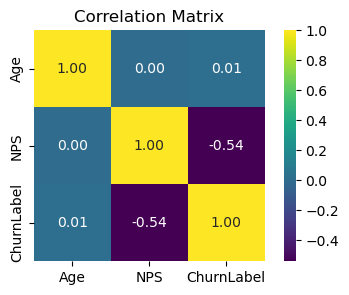

In [720]:
plt.figure(figsize=(5, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

**Exploring and visualizing Age Column**

In [721]:
df['Age'].min()

18

In [722]:
df['Age'].max()

70

In [723]:
df['Age'].mean()

43.93006488824802

In [724]:
df['Age'].std()

15.34152135256695

<Figure size 500x300 with 0 Axes>

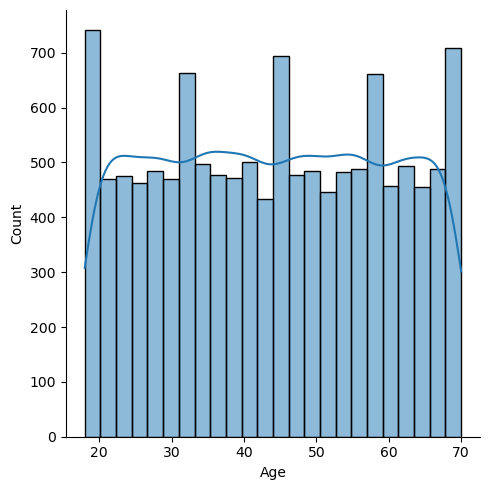

In [725]:
plt.figure(figsize=(5, 3))

sns.displot(df['Age'],kde = True)

****Exploring and visualizing NPS Column****

In [726]:
# Calculate min, max, mean, and std for ChurnLabel
NPS_stats = df['NPS'].agg(['min', 'max', 'mean', 'std'])

# Display the results
print(NPS_stats)

min     0.000000
max     9.000000
mean    2.973884
std     2.644623
Name: NPS, dtype: float64


<Figure size 500x300 with 0 Axes>

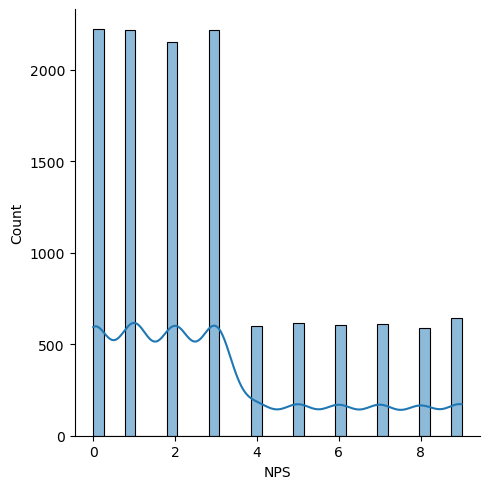

In [727]:
plt.figure(figsize=(5, 3))

sns.displot(df['NPS'],kde = True)

**Exploring and visualizing ChurnLabel Column**

In [728]:
# Calculate min, max, mean, and std for ChurnLabel
Chun_Label_stats = df['ChurnLabel'].agg(['min', 'max', 'mean', 'std'])

# Display the results
print(Chun_Label_stats)

min     0.000000
max     1.000000
mean    0.505808
std     0.499986
Name: ChurnLabel, dtype: float64


<Figure size 500x300 with 0 Axes>

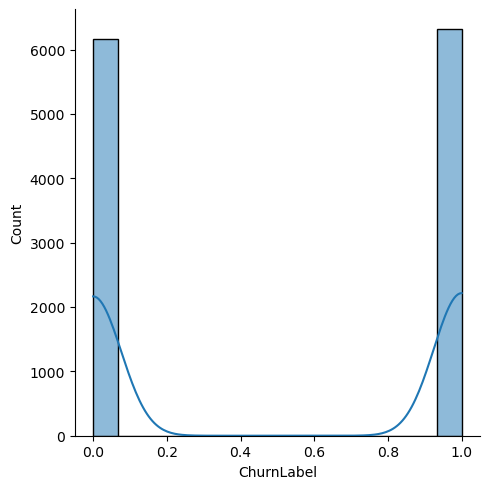

In [729]:
plt.figure(figsize=(5, 3))

sns.displot(df['ChurnLabel'],kde = True)

The dataset has a nearly equal number of customers who have churned (ChurnLabel=1) and those who haven't churned (ChurnLabel=0).

In [730]:
df_categorical = df[['Name',
                     'Gender',
                     'Location',
                     'Email',
                     'Address',
                     'Segment',
                     'PurchaseHistory',
                     'SubscriptionDetails',
                     'ServiceInteractions',
                     'PaymentHistory',
                     'WebsiteUsage',
                     'ClickstreamData',
                     'EngagementMetrics',
                     'Feedback',
                     'MarketingCommunication']]
df_categorical.head(1)

,Name,Gender,Location,Email,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication
0,Mark Barrett,Male,Andrewfort,allison74@example.net,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ..."


**Exploring and visualizing Gender Column**

In [731]:
# Get unique genders and their counts
gender_counts = df['Gender'].value_counts()

# Display the results
unique_genders = gender_counts.index.tolist()
count_genders = gender_counts.values.tolist()

# Print unique genders and their counts
print("Unique Genders:", unique_genders)
print("Counts:", count_genders)

Unique Genders: ['Male', 'Female']
Counts: [6269, 6214]


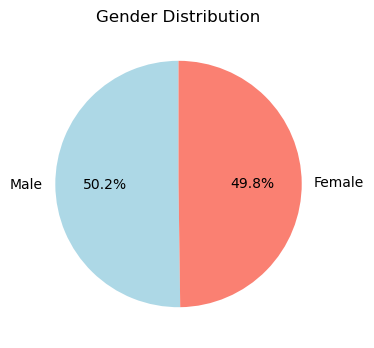

In [732]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()


# Plotting a pie chart

plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

The number of male and female customers is almost equal.

**Exploring and visualizing Segment Column**

In [733]:
# Get unique Segments and their counts
Segment_counts = df['Segment'].value_counts()

# Display the results
unique_Segments = Segment_counts.index.tolist()
count_Segments = Segment_counts.values.tolist()

# Print unique Segment and their counts
print("Unique Segment:", unique_Segments)
print("Counts:", count_Segments)

Unique Segment: ['Segment C', 'Segment A', 'Segment B']
Counts: [4199, 4157, 4127]


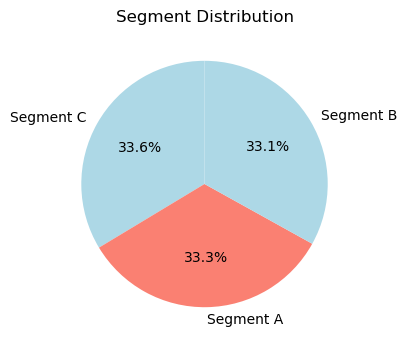

In [734]:
# Count the occurrences of each Segment
gender_counts = df['Segment'].value_counts()


# Plotting a pie chart

plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Segment Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

In [735]:
df['Location'].nunique()

9255

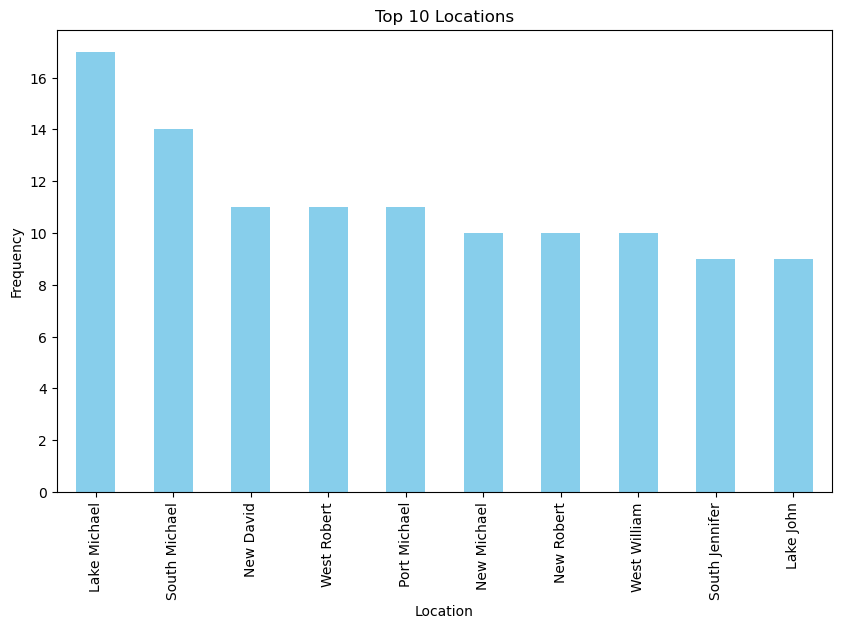

In [736]:
# The top 10 locations

top_n = 10  
top_locations = df['Location'].value_counts().head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

## Data Cleaning ##

In [737]:
# Check for Missing values 

df.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [738]:
# Check for Duplicates

df.duplicated().any()

False

**Convert TimeStamp to DateTime Format and Extract Month & Day**

In [739]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [740]:
# Extract month-year

df['Month-Year'] = df['Timestamp'].dt.to_period('M')

In [741]:
# Group by Month-Year and calculate churn rates

churn_rates = df.groupby('Month-Year').agg(total_customers=('ChurnLabel', 'count'),churned_customers=('ChurnLabel', 'sum'))

churn_rates['churn_rate'] = churn_rates['churned_customers'] / churn_rates['total_customers']

# Display the churn rates
churn_rates.head(5)

,total_customers,churned_customers,churn_rate
Month-Year,,,
2019-01,272,132,0.485294
2019-02,263,139,0.528517
2019-03,251,139,0.553785
2019-04,263,130,0.494297
2019-05,252,124,0.492063


**Visualizing Churn rate over Time**

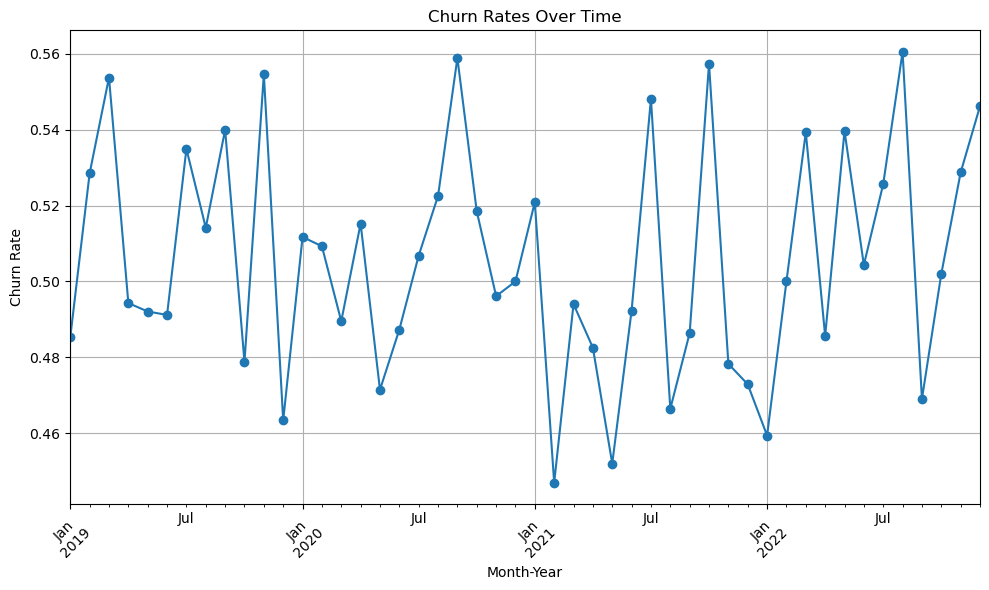

In [742]:
# Plotting churn rates over time

plt.figure(figsize=(10, 6))
churn_rates['churn_rate'].plot(marker='o')
plt.title('Churn Rates Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Extracting ratings from the Feedback column and adding a new column for them.**

In [743]:
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

**Establishing the connection between Feedback Ratings and Churn**

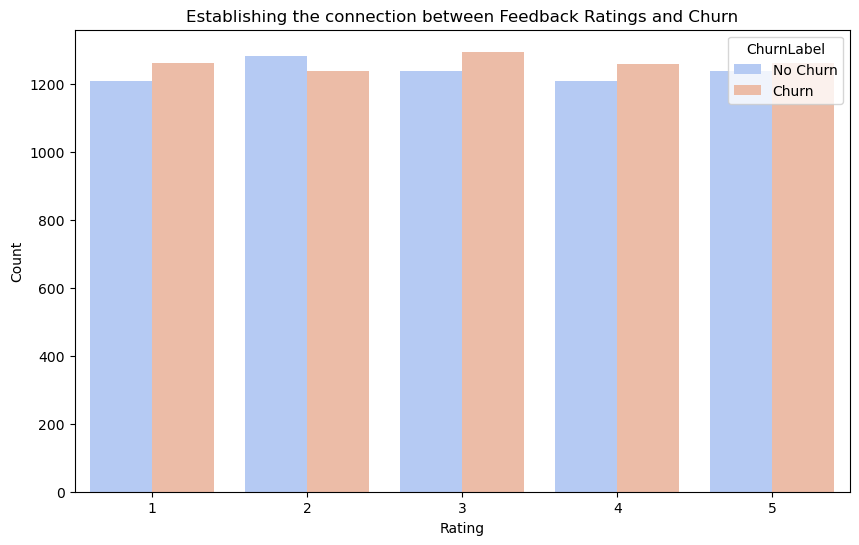

In [744]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FeedbackRating', hue='ChurnLabel', data=df, palette="coolwarm")
plt.title('Establishing the connection between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

## Feature Engineering ##

**Using Feature_columns as lists or dictionaries, which are initially imported into pandas as strings, and then converted to the appropriate data type using Python's literal_eval function**

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              12483 non-null  int64         
 1   Name                    12483 non-null  object        
 2   Age                     12483 non-null  int64         
 3   Gender                  12483 non-null  object        
 4   Location                12483 non-null  object        
 5   Email                   12483 non-null  object        
 6   Phone                   12483 non-null  object        
 7   Address                 12483 non-null  object        
 8   Segment                 12483 non-null  object        
 9   PurchaseHistory         12483 non-null  object        
 10  SubscriptionDetails     12483 non-null  object        
 11  ServiceInteractions     12483 non-null  object        
 12  PaymentHistory          12483 non-null  object

In [746]:
feature_column = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

for attribute in feature_column:
    df[attribute] = df[attribute].apply(literal_eval)

#### Extracting featurees from PurchaseHistory

In [747]:
def get_purchased_products(purchase_history):
    return '|'.join(item['Product'] for item in purchase_history)

def get_purchase_frequency(purchase_history):
    return sum(item['Frequency'] for item in purchase_history)

def get_purchase_value(purchase_history):
    return sum(item['Value'] for item in purchase_history)

df['PurchasedProducts'] = df['PurchaseHistory'].apply(get_purchased_products)
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(get_purchase_frequency)
df['PurchaseValue'] = df['PurchaseHistory'].apply(get_purchase_value)

**Extracting featurees from SubscriptionDetails**

In [748]:
def get_subscription_plan(subscription_details):
    return subscription_details.get('Plan', None)

def get_subscription_start_date(subscription_details):
    return subscription_details.get('Start_Date', None)

def get_subscription_end_date(subscription_details):
    return subscription_details.get('End_Date', None)

def calculate_subscription_duration(start_date, end_date):
    if pd.notnull(start_date) and pd.notnull(end_date):
        return (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days
    return None

df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(get_subscription_plan)
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(get_subscription_start_date)
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(get_subscription_end_date)
df['SubscriptionDuration'] = df.apply(lambda row: calculate_subscription_duration(row['SubscriptionStartDate'], row['SubscriptionEndDate']), axis=1)

**Extracting featurees from website_usage**

In [749]:
def get_website_page_views(website_usage):
    return website_usage.get('PageViews', 0)

def get_website_time_spent(website_usage):
    return website_usage.get('TimeSpent(minutes)', 0)

df['WebsitePageViews'] = df['WebsiteUsage'].apply(get_website_page_views)
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(get_website_time_spent)

**Extracting featurees from EngagementMetrics**

In [750]:
def get_engagement_metrics_logins(engagement_metrics):
    return engagement_metrics.get('Logins', 0)

def get_engagement_metrics_frequency(engagement_metrics):
    return engagement_metrics.get('Frequency', 'Unknown')

df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(get_engagement_metrics_logins)
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(get_engagement_metrics_frequency)

**Extracting featurees from feedback**

In [751]:
def get_feedback_rating(feedback):
    return feedback.get('Rating', None)

def get_feedback_comment(feedback):
    return feedback.get('Comment', '')

df['FeedbackRating'] = df['Feedback'].apply(get_feedback_rating)
df['FeedbackComment'] = df['Feedback'].apply(get_feedback_comment)

**Extracting featurees from EngagementMetrics**

In [752]:
def count_emails(marketing_communication):
    return len(marketing_communication)

def average_open_click_duration(marketing_communication):
    durations = []
    for email in marketing_communication:
        opened = pd.to_datetime(email.get('Email_Opened'))
        clicked = pd.to_datetime(email.get('Email_Clicked'))
        if pd.notnull(opened) and pd.notnull(clicked):
            duration = (clicked - opened).days
            durations.append(duration)
    return np.mean(durations) if durations else None

def average_sent_open_duration(marketing_communication):
    durations = []
    for email in marketing_communication:
        sent = pd.to_datetime(email.get('Email_Sent'))
        opened = pd.to_datetime(email.get('Email_Opened'))
        if pd.notnull(sent) and pd.notnull(opened):
            duration = (opened - sent).days
            durations.append(duration)
    return np.mean(durations) if durations else None

df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(count_emails)
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(average_open_click_duration)
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(average_sent_open_duration)

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CustomerID                           12483 non-null  int64         
 1   Name                                 12483 non-null  object        
 2   Age                                  12483 non-null  int64         
 3   Gender                               12483 non-null  object        
 4   Location                             12483 non-null  object        
 5   Email                                12483 non-null  object        
 6   Phone                                12483 non-null  object        
 7   Address                              12483 non-null  object        
 8   Segment                              12483 non-null  object        
 9   PurchaseHistory                      12483 non-null  object        
 10  Subscripti

**Creating more new features from ServiceInteractions, PaymentHistory, and ClickstreamData by examining the unique values in these columns.**

In [754]:
# Extract unique service interaction types from the ServiceInteractions column
def get_unique_service_interaction_types(service_interactions):
    types = set()
    for interactions in service_interactions:
        for interaction in interactions:
            types.add(interaction['Type'])
    return list(types)


# Apply the function to the DataFrame and get unique types
unique_service_interaction_types = get_unique_service_interaction_types(df['ServiceInteractions'])


# Print the unique service interaction types
print('All unique Service Interaction Types:', unique_service_interaction_types)

All unique Service Interaction Types: ['Call', 'Chat', 'Email']


In [755]:
# Extract unique payment history methods from the PaymentHistory column
def get_unique_payment_methods(payment_history):
    methods = set()
    for history in payment_history:
        for payment in history:
            methods.add(payment['Method'])
    return list(methods)

# Apply the function to the DataFrame and get unique methods
unique_payment_methods = get_unique_payment_methods(df['PaymentHistory'])

# Print the unique payment history methods
print('All unique Payment History Methods:', unique_payment_methods)

All unique Payment History Methods: ['Bank Transfer', 'Credit Card', 'PayPal']


In [756]:
# Extract unique clickstream data actions from the ClickstreamData column
def get_unique_clickstream_actions(clickstream_data):
    actions = set()
    for data in clickstream_data:
        for entry in data:
            actions.add(entry['Action'])
    return list(actions)

# Apply the function to the DataFrame and get unique actions
unique_clickstream_actions = get_unique_clickstream_actions(df['ClickstreamData'])

# Print the unique clickstream data actions
print('All unique Clickstream Data Actions:', unique_clickstream_actions)

All unique Clickstream Data Actions: ['Click', 'Add to Cart', 'Search']


**More hidden features ServiceInteractions, PaymentHistory, and ClickstreamData possess**

In [757]:
# From: ServiceInteractions
# Extract: Count the number of service interactions made through Email, Call, and Chat.

def count_interactions_by_type(service_interactions, interaction_type):
    """Count interactions of a specific type."""
    return len([interaction for interaction in service_interactions if interaction['Type'] == interaction_type])

# Create new columns for each unique service interaction type
for interaction_type in unique_service_interaction_types:  # Ensure this variable is defined
    column_name = f'ServiceInteractions_{interaction_type}'
    df[column_name] = df['ServiceInteractions'].apply(lambda interactions: count_interactions_by_type(interactions, interaction_type))

# Optional: Print the new columns for verification
print('New service interaction columns added:', df.columns[df.columns.str.startswith('ServiceInteractions_')])

New service interaction columns added: Index(['ServiceInteractions_Call', 'ServiceInteractions_Chat',
       'ServiceInteractions_Email'],
      dtype='object')


In [758]:
# From: PaymentHistory
# Extract:
#   - PaymentHistoryNoOfLatePayments: Total number of late payments by the user
#   - PaymentHistoryAvgNoOfLatePayments: Average number of late payments by the user

# Total late payments
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda history: sum(i['Late_Payments'] for i in history))

# Average late payments
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda history: np.mean([i['Late_Payments'] for i in history]))

In [759]:
# Extract unique clickstream data actions
def get_unique_clickstream_actions(clickstream_data):
    return list({entry['Action'] for data in clickstream_data for entry in data})

# Get unique actions
unique_clickstream_data_actions = get_unique_clickstream_actions(df['ClickstreamData'])

# Count occurrences of each action in clickstream data
def count_clickstream_actions(clickstream_data, action):
    return sum(entry['Action'] == action for entry in clickstream_data)

# Create new columns for each unique clickstream action
for action in unique_clickstream_data_actions:
    df[f'ClickStreamData_{action}'] = df['ClickstreamData'].apply(lambda x: count_clickstream_actions(x, action))

# Optional: Print new columns for verification
print('New clickstream action columns added:', df.columns[df.columns.str.startswith('ClickStreamData_')])

New clickstream action columns added: Index(['ClickStreamData_Click', 'ClickStreamData_Add to Cart',
       'ClickStreamData_Search'],
      dtype='object')


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CustomerID                           12483 non-null  int64         
 1   Name                                 12483 non-null  object        
 2   Age                                  12483 non-null  int64         
 3   Gender                               12483 non-null  object        
 4   Location                             12483 non-null  object        
 5   Email                                12483 non-null  object        
 6   Phone                                12483 non-null  object        
 7   Address                              12483 non-null  object        
 8   Segment                              12483 non-null  object        
 9   PurchaseHistory                      12483 non-null  object        
 10  Subscripti

In [761]:
df.shape

(12483, 46)

**Drop some Columns**

In [762]:
# Drop specific columns from the DataFrame
columns_to_drop = ['CustomerID', 'Name', 'Location']  
df.drop(columns = columns_to_drop, inplace=True)

In [763]:
# Create a copy with a new name
df_2 = df.copy()  
df_2.columns.tolist()

['Age',
 'Gender',
 'Email',
 'Phone',
 'Address',
 'Segment',
 'PurchaseHistory',
 'SubscriptionDetails',
 'ServiceInteractions',
 'PaymentHistory',
 'WebsiteUsage',
 'ClickstreamData',
 'EngagementMetrics',
 'Feedback',
 'MarketingCommunication',
 'NPS',
 'ChurnLabel',
 'Timestamp',
 'Month-Year',
 'FeedbackRating',
 'PurchasedProducts',
 'PurchaseFrequency',
 'PurchaseValue',
 'SubscriptionPlan',
 'SubscriptionStartDate',
 'SubscriptionEndDate',
 'SubscriptionDuration',
 'WebsitePageViews',
 'WebsiteTimeSpent',
 'EngagementMetricsLogins',
 'EngagementMetricsFrequency',
 'FeedbackComment',
 'MarketingCommunicationNoOfEmails',
 'MarketingCommunicationOpenClickDiff',
 'MarketingCommunicationSentOpenDiff',
 'ServiceInteractions_Call',
 'ServiceInteractions_Chat',
 'ServiceInteractions_Email',
 'PaymentHistoryNoOfLatePayments',
 'PaymentHistoryAvgNoOfLatePayments',
 'ClickStreamData_Click',
 'ClickStreamData_Add to Cart',
 'ClickStreamData_Search']

In [764]:
new_df = df_2[['Age',
          'Gender',
          'Segment',
          'NPS',
          'ChurnLabel',
          'PurchaseFrequency',
          'PurchaseValue',
          'SubscriptionPlan',
          'WebsitePageViews',
          'WebsiteTimeSpent',
          'EngagementMetricsLogins',
          'EngagementMetricsFrequency',
          'FeedbackRating',
          'MarketingCommunicationNoOfEmails',
          'MarketingCommunicationOpenClickDiff',
          'MarketingCommunicationSentOpenDiff',
          'ServiceInteractions_Call',
          'ServiceInteractions_Email',
          'ServiceInteractions_Chat',
          'PaymentHistoryNoOfLatePayments',
          'PaymentHistoryAvgNoOfLatePayments',
          'ClickStreamData_Click',
          'ClickStreamData_Add to Cart',
          'ClickStreamData_Search',
          'SubscriptionDuration']]

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  12483 non-null  int64  
 1   Gender                               12483 non-null  object 
 2   Segment                              12483 non-null  object 
 3   NPS                                  12483 non-null  int64  
 4   ChurnLabel                           12483 non-null  int64  
 5   PurchaseFrequency                    12483 non-null  int64  
 6   PurchaseValue                        12483 non-null  float64
 7   SubscriptionPlan                     12483 non-null  object 
 8   WebsitePageViews                     12483 non-null  int64  
 9   WebsiteTimeSpent                     12483 non-null  int64  
 10  EngagementMetricsLogins              12483 non-null  int64  
 11  EngagementMetricsFrequency  

**Checking the Unique values and their number for Columns with Data Type == Object**

Gender

In [765]:
new_df['Gender']

0          Male
1        Female
2        Female
3        Female
4        Female
          ...  
12478    Female
12479      Male
12480      Male
12481    Female
12482      Male
Name: Gender, Length: 12483, dtype: object

In [766]:
# Get unique values of Gender and their count
unique_values = df['Gender'].unique()
unique_count = df['Gender'].nunique()

# Print unique values of Gender and their count
print('Unique values in Gender:', unique_values)
print('Number of unique values:', unique_count)

Unique values in Gender: ['Male' 'Female']
Number of unique values: 2


Segment

In [767]:
new_df['Segment']

0        Segment B
1        Segment C
2        Segment B
3        Segment C
4        Segment C
           ...    
12478    Segment A
12479    Segment A
12480    Segment C
12481    Segment A
12482    Segment C
Name: Segment, Length: 12483, dtype: object

In [768]:
# Get unique values of Segment and their count
unique_values = df['Segment'].unique()
unique_count = df['Segment'].nunique()

# Print unique values of Segment and their count
print('Unique values in Segment:', unique_values)
print('Number of unique values:', unique_count)

Unique values in Segment: ['Segment B' 'Segment C' 'Segment A']
Number of unique values: 3


Subcription Plan

In [769]:
new_df['SubscriptionPlan']

0          Express
1              Pro
2        Essential
3            Smart
4            Basic
           ...    
12478    Essential
12479         Flex
12480       Deluxe
12481         Gold
12482        Prime
Name: SubscriptionPlan, Length: 12483, dtype: object

In [770]:
# Get unique values of Subscription Plan and their count
unique_values = df['SubscriptionPlan'].unique()
unique_count = df['SubscriptionPlan'].nunique()

# Print unique values of Subscription Plan and their count
print('Unique values in Subscription Plan:', unique_values)
# Print a blank line for space
print()
print('Number of unique values:', unique_count)

Unique values in Subscription Plan: ['Express' 'Pro' 'Essential' 'Smart' 'Basic' 'Select' 'Prime' 'Silver'
 'Gold' 'Plus' 'Elite' 'Trial' 'Flex' 'Student' 'Family' 'Bronze' 'VIP'
 'Deluxe' 'Unlimited' 'Eco']

Number of unique values: 20


Engagement Metrics Frequency

In [771]:
new_df['EngagementMetricsFrequency']

0         Weekly
1         Weekly
2        Monthly
3          Daily
4         Weekly
          ...   
12478      Daily
12479     Weekly
12480    Monthly
12481    Monthly
12482     Weekly
Name: EngagementMetricsFrequency, Length: 12483, dtype: object

In [772]:
# Get unique values of EngagementMetrics Frequency and their count
unique_values = df['EngagementMetricsFrequency'].unique()
unique_count = df['EngagementMetricsFrequency'].nunique()

# Print unique values of EngagementMetrics Frequency and their count
print('Unique values in EngagementMetrics Frequency:', unique_values)
print('Number of unique values:', unique_count)

Unique values in EngagementMetrics Frequency: ['Weekly' 'Monthly' 'Daily']
Number of unique values: 3


**Converting categorical data to numerical data**

In [773]:
# Gender
label_encoder = LabelEncoder()
new_df['Gender'] = label_encoder.fit_transform(df['Gender'])

new_df['Gender']

0        1
1        0
2        0
3        0
4        0
        ..
12478    0
12479    1
12480    1
12481    0
12482    1
Name: Gender, Length: 12483, dtype: int32

In [774]:
# Segment
label_encoder = LabelEncoder()
new_df['Segment'] = label_encoder.fit_transform(df['Segment'])

new_df['Segment']

0        1
1        2
2        1
3        2
4        2
        ..
12478    0
12479    0
12480    2
12481    0
12482    2
Name: Segment, Length: 12483, dtype: int32

In [775]:
# EngagementMetrics Frequency
label_encoder = LabelEncoder()
new_df['SubscriptionPlan'] = label_encoder.fit_transform(df['SubscriptionPlan'])

new_df['SubscriptionPlan']

0         6
1        12
2         5
3        15
4         0
         ..
12478     5
12479     8
12480     2
12481     9
12482    11
Name: SubscriptionPlan, Length: 12483, dtype: int32

In [776]:
# Gender
label_encoder = LabelEncoder()
new_df['EngagementMetricsFrequency'] = label_encoder.fit_transform(df['EngagementMetricsFrequency'])

new_df['EngagementMetricsFrequency']

0        2
1        2
2        1
3        0
4        2
        ..
12478    0
12479    2
12480    1
12481    1
12482    2
Name: EngagementMetricsFrequency, Length: 12483, dtype: int32

In [777]:
new_df.loc[0].T

Age                                      31.000000
Gender                                    1.000000
Segment                                   1.000000
NPS                                       3.000000
ChurnLabel                                1.000000
PurchaseFrequency                        38.000000
PurchaseValue                          3994.720000
SubscriptionPlan                          6.000000
WebsitePageViews                         49.000000
WebsiteTimeSpent                         15.000000
EngagementMetricsLogins                  19.000000
EngagementMetricsFrequency                2.000000
FeedbackRating                            1.000000
MarketingCommunicationNoOfEmails          8.000000
MarketingCommunicationOpenClickDiff     319.000000
MarketingCommunicationSentOpenDiff      818.000000
ServiceInteractions_Call                  1.000000
ServiceInteractions_Email                 1.000000
ServiceInteractions_Chat                  2.000000
PaymentHistoryNoOfLatePayments 

In [778]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  12483 non-null  int64  
 1   Gender                               12483 non-null  int32  
 2   Segment                              12483 non-null  int32  
 3   NPS                                  12483 non-null  int64  
 4   ChurnLabel                           12483 non-null  int64  
 5   PurchaseFrequency                    12483 non-null  int64  
 6   PurchaseValue                        12483 non-null  float64
 7   SubscriptionPlan                     12483 non-null  int32  
 8   WebsitePageViews                     12483 non-null  int64  
 9   WebsiteTimeSpent                     12483 non-null  int64  
 10  EngagementMetricsLogins              12483 non-null  int64  
 11  EngagementMetricsFrequency  

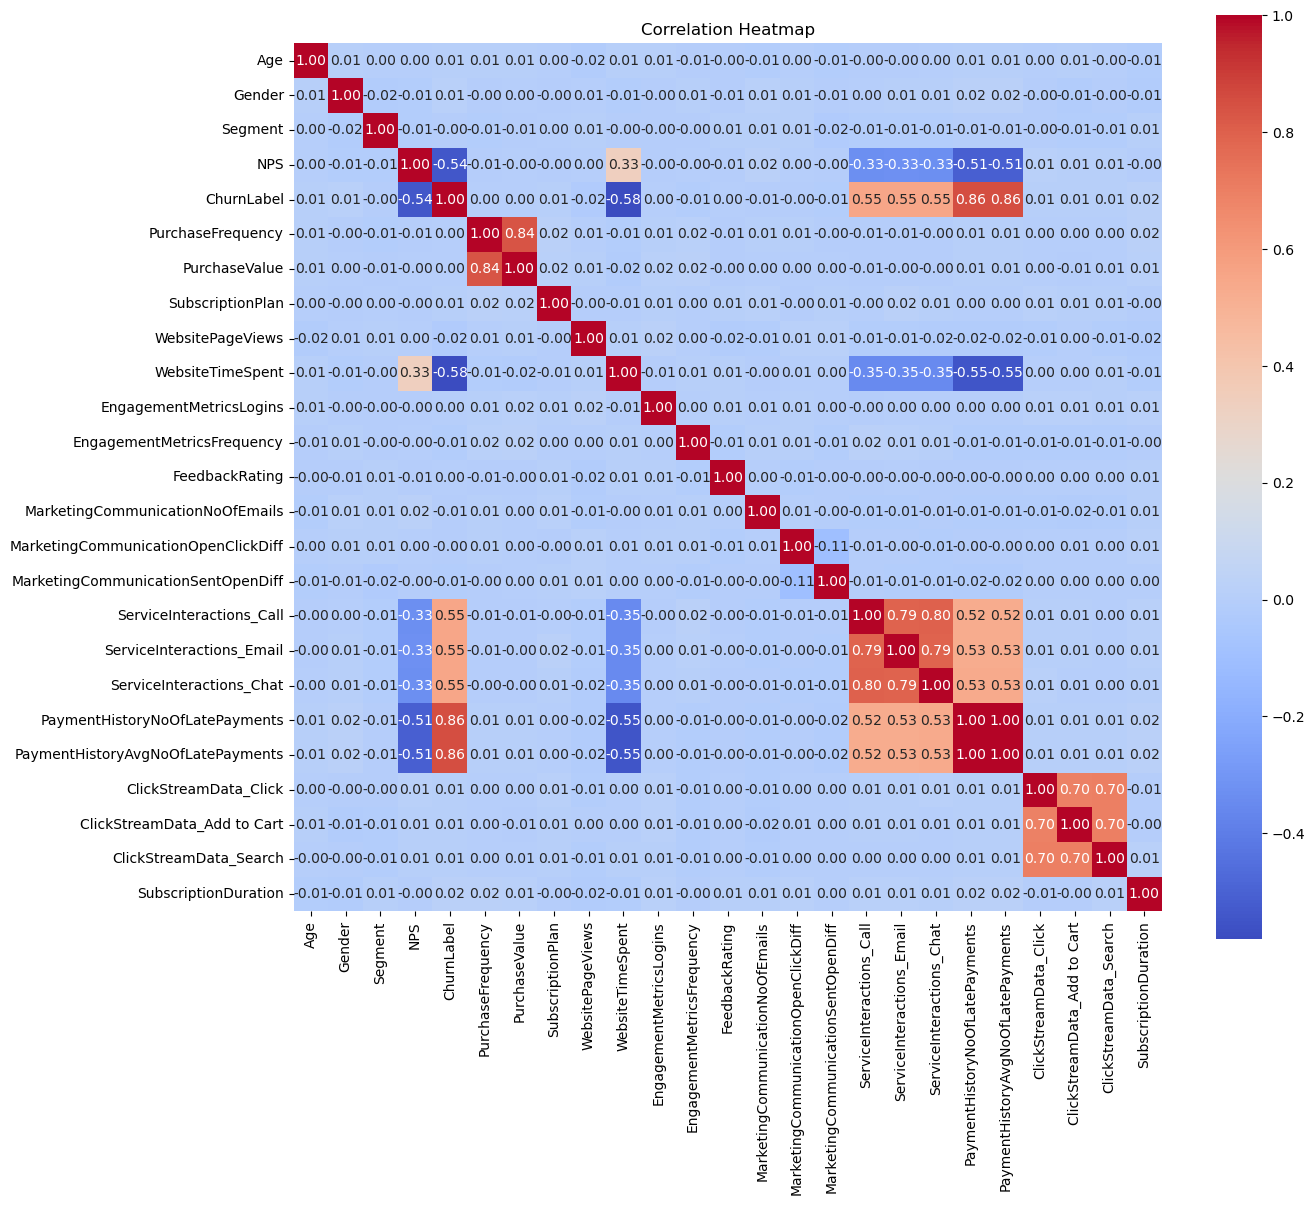

In [779]:
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Add titles and labels
plt.title('Correlation Heatmap')
plt.show()

Focusing on ChurnLabel, we see:

NPS: moderate negative correlation (-0.54).
WebsiteTimeSpent: moderate negative correlation (-0.58).
ServiceInteractions (Call, Email, Chat): moderate positive correlation (0.55).
PaymentHistory (No. of Late Payments, Avg. Late Payments): strong positive correlation (0.86).

**Preparaing Data for Machine learning Algorithm Using SKlearn Split**

**Split Dataframe**

In [780]:
# Get X and y ('ChurnLabel')
X = new_df.drop(columns=['ChurnLabel'])
y = new_df['ChurnLabel']

# Split into train, validation and test set
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

**Rescaling to Sklearn's StandardScaler and representing it as ss**

In [781]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

## Modelling with Logistic Regression  
##### To develop a function to assess each model across any subset.
##### The evaluation focuses on four essential metrics:
Accuracy

Precision

Recall

F1 Score

In [782]:
def evaluate_model(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f"{subset} Accuracy: {accuracy_score(y, y_pred)}")
    print(f"{subset} Precision: {precision_score(y, y_pred)}")
    print(f"{subset} Recall: {recall_score(y, y_pred)}")
    print(f"{subset} F1 Score: {f1_score(y, y_pred)}\n")

In [783]:
# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate on training and validation sets
evaluate_model(X_train, y_train, log_reg, 'Train')
evaluate_model(X_val, y_val, log_reg, 'Validation')

Train Accuracy: 0.9708592028840376
Train Precision: 0.9767025089605734
Train Recall: 0.9657412876550502
Train F1 Score: 0.9711909711909711

Validation Accuracy: 0.968
Validation Precision: 0.9643835616438357
Validation Recall: 0.9696969696969697
Validation F1 Score: 0.967032967032967



##### Logistic Regression Model Evaluation Metrics

##### Train Metrics:
Accuracy (97.1%): The model correctly classifies a high percentage of training data.

Precision (97.7%): When it predicts a positive class, it's right 97.7% of the time.

Recall (96.6%): It identifies 96.6% of actual positive cases.

F1 Score (97.1%): This score balances precision and recall, showing strong overall performance.

##### Validation Metrics:
Accuracy (96.8%): The model performs well on new, unseen data.

Precision (96.4%): It maintains good predictive quality, slightly lower than on training data.

Recall (96.9%): Consistently identifies nearly all positive cases.

F1 Score (96.7%): Remains high, indicating balanced performance on the validation set.

##### Summary:
Overall, your logistic regression model is performing excellently, with strong accuracy, precision, and recall on both training and validation datasets, showing it generalizes well to new data.

In [784]:
# evaluate model
# The final evaluation will be performed on the designated test set (X_test, y_test).

# Evaluate the Logistic Regression model on the test set
evaluate_model(X_test, y_test, log_reg, 'Logistic Regression Test')

Logistic Regression Test Accuracy: 0.9690898683457355
Logistic Regression Test Precision: 0.9733796296296297
Logistic Regression Test Recall: 0.9644495412844036
Logistic Regression Test F1 Score: 0.9688940092165897



##### Test Metrics:
Accuracy (96.9%): The model correctly classifies 96.9% of the test data.

Precision (97.3%): When it predicts a positive class, it's accurate 97.3% of the time.

Recall (96.4%): It successfully identifies 96.4% of actual positive cases.

F1 Score (96.9%): This score reflects a strong balance between precision and recall.

##### Summary:
Your logistic regression model performs very well on the test set, demonstrating high accuracy and reliability in predictions.

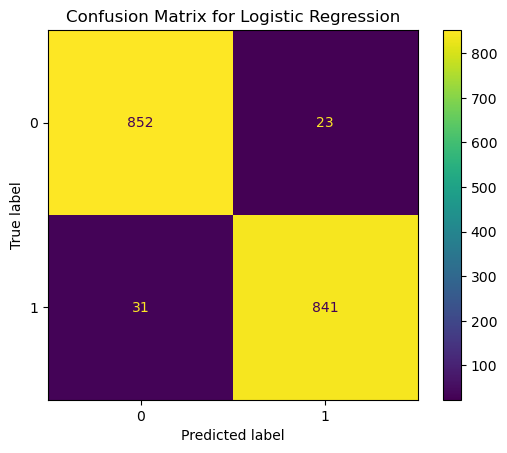

In [789]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = log_reg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Confusion Matrix
Displays true and false positive/negative counts, providing a clear view of where the model performs well and where it makes mistakes.

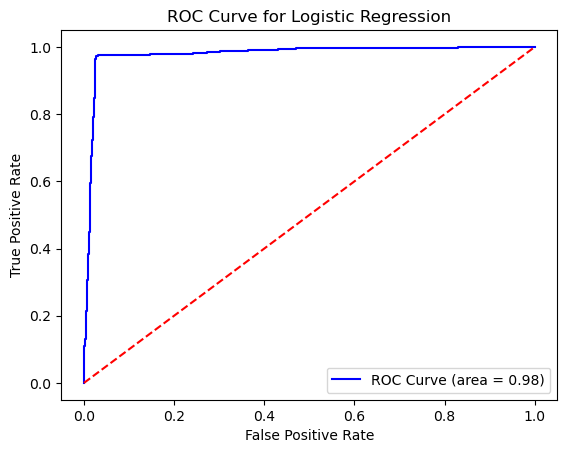

In [787]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

ROC Curve shows the model’s ability to distinguish between classes. 
A curve closer to the top-left indicates better performance, with the AUC measuring overall accuracy.

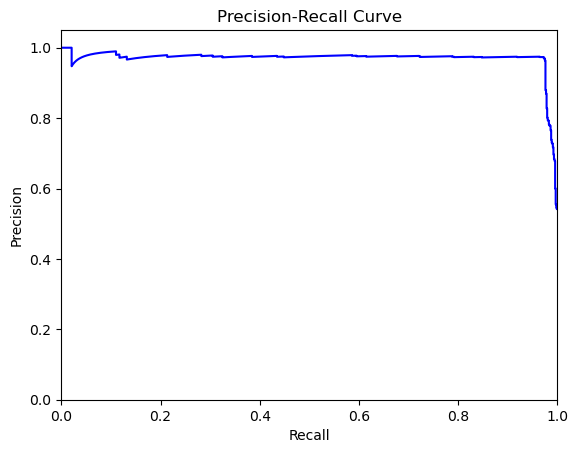

In [788]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure()
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

Precision-Recall Curve
Illustrates the trade-off between precision (accuracy of positive predictions) and recall (ability to find all positives). Higher values in both metrics indicate better performance.

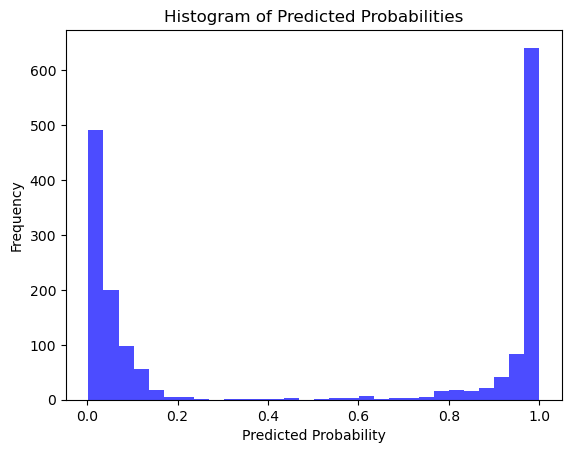

In [791]:
# Histogram of predicted probabilities
plt.figure()
plt.hist(y_probs, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

Histogram of Predicted Probabilities
Displays the distribution of predicted probabilities for the positive class, indicating how confident the model is in its predictions.

## Modelling with Decision Tree
##### To develop a function to assess each model across any subset.
##### The evaluation focuses on four essential metrics:
Accuracy

Precision

Recall

F1 Score

In [793]:
def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)
    metrics = [("Accuracy", accuracy_score(y, y_pred)),
               ("Precision", precision_score(y, y_pred)),
               ("Recall", recall_score(y, y_pred)),
               ("F1", f1_score(y, y_pred))]
    
    for name, score in metrics:
        print(f"{subset} {name} Score: {score:.4f}")

In [794]:
# Build and fit the model
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree .fit(X_train, y_train)

# Evaluate on train and validation subsets
evaluate(X_train, y_train, decision_tree , 'Train')
evaluate(X_val, y_val, decision_tree , 'Validation')

Train Accuracy Score: 0.9769
Train Precision Score: 0.9775
Train Recall Score: 0.9770
Train F1 Score: 0.9773
Validation Accuracy Score: 0.9667
Validation Precision Score: 0.9617
Validation Recall Score: 0.9697
Validation F1 Score: 0.9657


##### The evaluation results indicate the following:

##### Training Performance:
Accuracy (97.7%): The model correctly classifies nearly all training data.

Precision (97.8%): When it predicts a positive class, it's accurate 97.8% of the time.

Recall (97.7%): The model identifies 97.7% of actual positive cases.

F1 Score (97.7%): This reflects a strong balance between precision and recall.

##### Validation Performance:
Accuracy (96.7%): The model performs well on unseen validation data.

Precision (96.2%): It maintains good predictive quality, slightly lower than on training data.

Recall (96.9%): The model successfully identifies 96.9% of actual positives.

F1 Score (96.6%): This score indicates a balanced performance, though slightly lower than on training data.

##### Summary:
Overall, the decision tree model performs excellently on both training and validation sets, demonstrating good generalization with a slight drop in metrics on validation, which is typical in machine learning.

In [795]:
# evaluate the decision tree model on the test set
evaluate(X_test, y_test, decision_tree, 'DecisionTree Test')

DecisionTree Test Accuracy Score: 0.9731
DecisionTree Test Precision Score: 0.9736
DecisionTree Test Recall Score: 0.9725
DecisionTree Test F1 Score: 0.9730


##### The test results for the decision tree model are as follows:

Accuracy (97.3%): The model correctly classifies 97.3% of the test data.

Precision (97.4%): When it predicts a positive class, it's accurate 97.4% of the time.

Recall (97.3%): The model identifies 97.3% of actual positive cases.

F1 Score (97.3%): This indicates a strong balance between precision and recall.

##### Summary:
Overall, the decision tree model performs very well on the test set, demonstrating excellent generalization and reliability in its predictions.

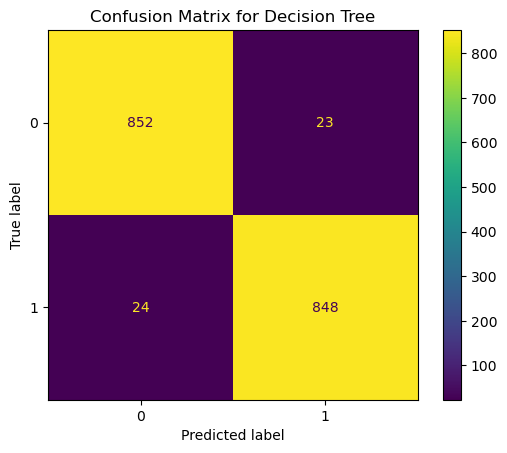

In [799]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = decision_tree.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

The confusion matrix provides a clear view of correct and incorrect predictions, helping identify areas where the model may need improvement.

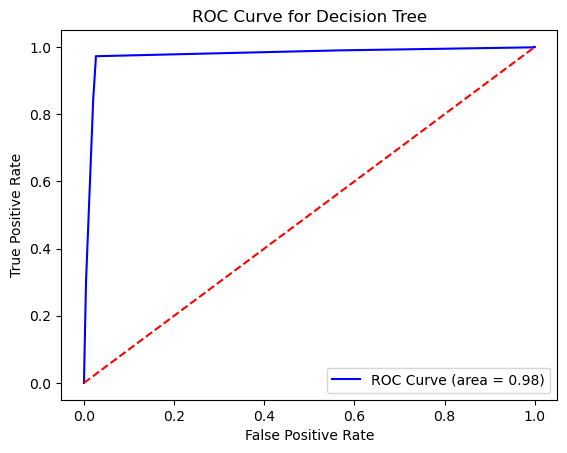

In [797]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = decision_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

ROC Curve (Receiver Operating Characteristic)
The ROC curve shows the model's ability to distinguish between classes, with an AUC close to 1 indicating excellent performance.

AUC (Area Under the Curve) in the ROC curve quantifies a model's ability to distinguish between classes:

Range:
1.0 = perfect classification.
0.5 = no discriminative ability (like random guessing).
Below 0.5 = worse than random.
A higher AUC indicates better model performance in differentiating between positive and negative classes.

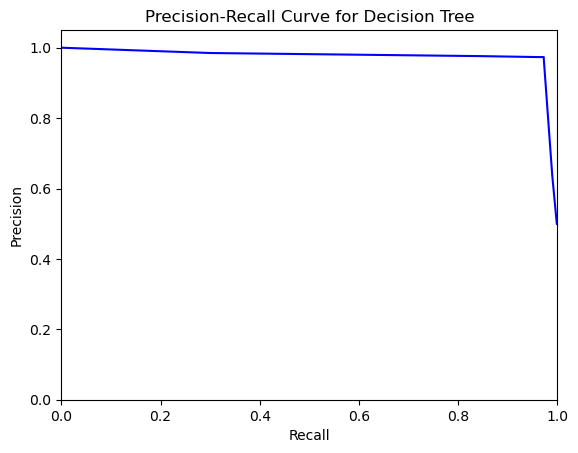

In [798]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting
plt.figure()
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

Precision-Recall Curve
This curve illustrates the balance between precision and recall, highlighting the model's effectiveness in identifying positive cases. Higher values indicate strong performance.

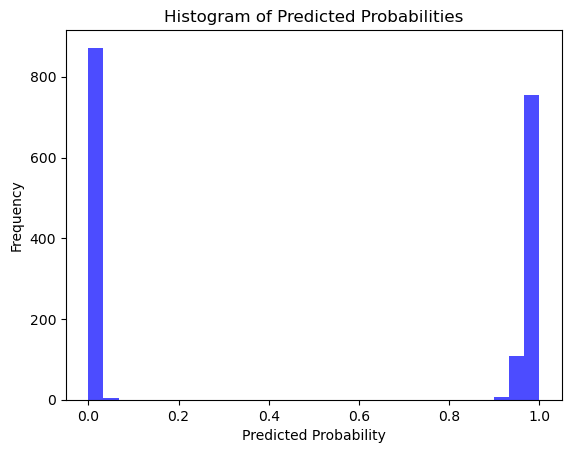

In [801]:
# Histogram of predicted probabilities
plt.figure()
plt.hist(y_probs, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

##### Histogram of Predicted Probabilities

it displays the distribution of predicted probabilities for the positive class, indicating the model's confidence in its predictions.

Together, these visualizations provide a comprehensive understanding of the model's performance and its predictive capabilities.

## Conclusion
##### The key factors influencing customer churn from the data are as follows:

Number of service interactions (calls, emails, chats)

Frequency of late payments

Time spent on the company’s website

Customer Net Promoter Score (NPS), indicating loyalty and satisfaction.


##### Model Comparison: Logistic Regression vs. Decision Tree

##### Logistic Regression Metrics:

Train Accuracy: 97.1%

Train Precision: 97.7%

Train Recall: 96.6%

Train F1 Score: 97.1%

Validation Accuracy: 96.8%

Validation Precision: 96.4%

Validation Recall: 96.9%

Validation F1 Score: 96.7%

Test Accuracy: 96.9%

Test Precision: 97.3%

Test Recall: 96.4%

Test F1 Score: 96.9%

##### Decision Tree Metrics:

Train Accuracy: 97.7%

Train Precision: 97.8%

Train Recall: 97.7%

Train F1 Score: 97.7%

Validation Accuracy: 96.7%

Validation Precision: 96.2%

Validation Recall: 96.9%

Validation F1 Score: 96.6%

Test Accuracy: 97.3%

Test Precision: 97.4%

Test Recall: 97.3%

Test F1 Score: 97.3%

##### Summary of Findings:

Training Set: The decision tree outperforms logistic regression in accuracy, precision, recall, and F1 score.

Validation Set: Logistic regression has slightly higher accuracy and recall, but the decision tree remains competitive.

Test Set: Both models perform well, but the decision tree has higher accuracy, precision, recall, and F1 score.

##### Overall Assessment:

Overall, the decision tree model performed better across most metrics, especially on the training and test sets, indicating strong generalization and reliability in predictions.